# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Create New Column for Competition  Results; Winners, Loser, and Draw 

In [12]:
EPL18.shape

(380, 6)

In [13]:
EPL18["Home_W"] = np.where(EPL18["FTR"] == "H", 1, np.where(EPL18["FTR"]  ==  "D",0.5,0))
EPL18["Away_W"] = np.where(EPL18["FTR"] == "A", 1, np.where(EPL18["FTR"]  ==  "D",0.5,0))
EPL18["Count"] = 1

In [14]:
EPL18[EPL18.loc[:,"FTHG"] == EPL18.loc[:,"FTAG"]].head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home_W,Away_W,Count
5,20170812,Southampton,Swansea,0,0,D,0.5,0.5,1
6,20170812,Watford,Liverpool,3,3,D,0.5,0.5,1
19,20170821,Man City,Everton,1,1,D,0.5,0.5,1
22,20170826,Huddersfield,Southampton,0,0,D,0.5,0.5,1
25,20170826,Watford,Brighton,0,0,D,0.5,0.5,1


In [15]:
EPL18.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home_W,Away_W,Count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1


## Split Data Two Part

Before 2018 and after 2018 1stHalf, 2ndHalf

In [16]:
Before_2018 = EPL18[EPL18.loc[:,"Date"] < 20180000]
After_2018 = EPL18[EPL18.loc[:,"Date"] > 20180000]

In [17]:
Before_2018.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home_W,Away_W,Count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1


## home team,away team

Calculate total games, wins, and goal score home and against each side and renaming column names

In [18]:
Home_2017 = Before_2018.groupby("HomeTeam")["Count","Home_W","FTHG","FTAG"].sum() \
                                                                           .reset_index()
Home_2017 = Home_2017.rename(columns = {"HomeTeam":"Team","FTHG":"FTHG_Home_17","FTAG":"FTAG_Home_17",
                                        "Count":"Home_P_17"}  )
Home_2017.head()

,Team,Home_P_17,Home_W,FTHG_Home_17,FTAG_Home_17
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7


In [19]:
Away_2017 = Before_2018.groupby("AwayTeam")["Count","Away_W","FTHG","FTAG"].sum() \
                                                                           .reset_index()
Away_2017 = Away_2017.rename(columns = {"AwayTeam":"Team","FTHG":"FTHG_Away_17","FTAG":"FTAG_Away_17",
                                        "Count":"Away_P_17"})
Away_2017.head()


,Team,Away_P_17,Away_W,FTHG_Away_17,FTAG_Away_17
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18


merge two dataframe

In [21]:
HA_2017 = pd.merge(Home_2017, Away_2017, on = "Team")
HA_2017.head()

,Team,Home_P_17,Home_W,FTHG_Home_17,FTAG_Home_17,Away_P_17,Away_W,FTHG_Away_17,FTAG_Away_17
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18


## Total Wins, Games, Total Goals Home and Away 

In [23]:
HA_2017["W2017"] = HA_2017["Home_W"] + HA_2017["Away_W"]
HA_2017["G2017"] = HA_2017["Home_P_17"] + HA_2017["Away_P_17"]
HA_2017["Goal_A2017"] = HA_2017["FTAG_Home_17"] + HA_2017["FTHG_Away_17"]  
HA_2017["Goal_H2017"] = HA_2017["FTHG_Home_17"] + HA_2017["FTAG_Away_17"]   

## Pythagorean Expectation and Win Percentage

In [24]:
HA_2017["WPC_2017"] = HA_2017["W2017"] / HA_2017["G2017"] 
HA_2017["PYTH_2017"]  = HA_2017["Goal_H2017"]**2 / (HA_2017["Goal_H2017"]**2 + HA_2017["Goal_A2017"]**2)

In [25]:
HA_2017.head()

,Team,Home_P_17,Home_W,FTHG_Home_17,FTAG_Home_17,Away_P_17,Away_W,FTHG_Away_17,FTAG_Away_17,W2017,G2017,Goal_A2017,Goal_H2017,WPC_2017,PYTH_2017
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,26,38,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,32,20,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,25,15,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,17,18,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,14,39,0.738095,0.885847


## Same Steps For Season 2nd Half 2018

Calculate total games, wins, and goal score home and against each side and renaming column names

In [27]:
Home_2018 = After_2018.groupby("HomeTeam")["Count","Home_W","FTHG","FTAG"].sum() \
                                                                           .reset_index()
Home_2018 = Home_2018.rename(columns = {"HomeTeam":"Team","FTHG":"FTHG_Home_18","FTAG":"FTAG_Home_18",
                                        "Count":"Home_P_18"}  )
Home_2018.head()

,Team,Home_P_18,Home_W,FTHG_Home_18,FTAG_Home_18
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9


In [28]:
Away_2018 = After_2018.groupby("AwayTeam")["Count","Away_W","FTHG","FTAG"].sum() \
                                                                           .reset_index()
Away_2018 = Away_2018.rename(columns = {"AwayTeam":"Team","FTHG":"FTHG_Away_18","FTAG":"FTAG_Away_18",
                                        "Count":"Away_P_18"})
Away_2018.head()


,Team,Away_P_18,Away_W,FTHG_Away_18,FTAG_Away_18
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14


merge two dataframe

In [29]:
HA_2018 = pd.merge(Home_2018, Away_2018, on = "Team")
HA_2018.head()

,Team,Home_P_18,Home_W,FTHG_Home_18,FTAG_Home_18,Away_P_18,Away_W,FTHG_Away_18,FTAG_Away_18
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14


## Total Wins, Games, Total Goals Home and Away 

In [30]:
HA_2018["W2018"] = HA_2018["Home_W"] + HA_2018["Away_W"]
HA_2018["G2018"] = HA_2018["Home_P_18"] + HA_2018["Away_P_18"]
HA_2018["Goal_A2018"] = HA_2018["FTAG_Home_18"] + HA_2018["FTHG_Away_18"]  
HA_2018["Goal_H2018"] = HA_2018["FTHG_Home_18"] + HA_2018["FTAG_Away_18"]   

## Pythagorean Expectation and Win Percentage

In [31]:
HA_2018["WPC_2018"] = HA_2018["W2018"] / HA_2018["G2018"] 
HA_2018["PYTH_2018"]  = HA_2018["Goal_H2018"]**2 / (HA_2018["Goal_H2018"]**2 + HA_2018["Goal_A2018"]**2)

In [32]:
HA_2018.head()

,Team,Home_P_18,Home_W,FTHG_Home_18,FTAG_Home_18,Away_P_18,Away_W,FTHG_Away_18,FTAG_Away_18,W2018,G2018,Goal_A2018,Goal_H2018,WPC_2018,PYTH_2018
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,25,36,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,29,25,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,29,19,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,22,18,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,24,23,0.529412,0.478733


In [33]:
HA_2017.head()

,Team,Home_P_17,Home_W,FTHG_Home_17,FTAG_Home_17,Away_P_17,Away_W,FTHG_Away_17,FTAG_Away_17,W2017,G2017,Goal_A2017,Goal_H2017,WPC_2017,PYTH_2017
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,26,38,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,32,20,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,25,15,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,17,18,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,14,39,0.738095,0.885847


## Now merge 2017 and 2018 summary

In [34]:
HA_2017 = HA_2017.rename(columns = {"Home_W":"Home_W_17","Away_W":"Away_W_17"})
HA_2018 = HA_2018.rename(columns = {"Home_W":"Home_W_18","Away_W":"Away_W_18"})

In [41]:
All_Data = pd.merge(HA_2017, HA_2018)
print(All_Data.columns.tolist())

['Team', 'Home_P_17', 'Home_W_17', 'FTHG_Home_17', 'FTAG_Home_17', 'Away_P_17', 'Away_W_17', 'FTHG_Away_17', 'FTAG_Away_17', 'W2017', 'G2017', 'Goal_A2017', 'Goal_H2017', 'WPC_2017', 'PYTH_2017', 'Home_P_18', 'Home_W_18', 'FTHG_Home_18', 'FTAG_Home_18', 'Away_P_18', 'Away_W_18', 'FTHG_Away_18', 'FTAG_Away_18', 'W2018', 'G2018', 'Goal_A2018', 'Goal_H2018', 'WPC_2018', 'PYTH_2018']


In [ ]:
All_Data.head()

correlation matrix for the wpc and pyth variables for 2017 and 2018

In [42]:
All_Data.loc[:,["WPC_2017","PYTH_2017","WPC_2018","PYTH_2018"]].corr()

,WPC_2017,PYTH_2017,WPC_2018,PYTH_2018
WPC_2017,1.000000,0.968204,0.756573,0.745832
PYTH_2017,0.968204,1.000000,0.795693,0.795331
WPC_2018,0.756573,0.795693,1.000000,0.955986
PYTH_2018,0.745832,0.795331,0.955986,1.000000


## Scatter Plot with WPC/PYTH

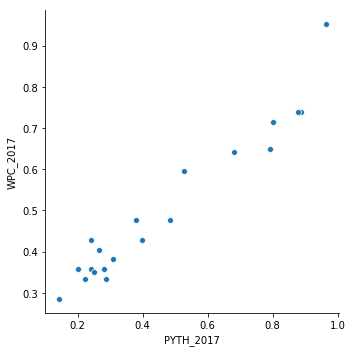

In [44]:
sns.relplot(x="PYTH_2017", y="WPC_2017", data =All_Data);

In [45]:
Pyth_Lm = smf.ols(formula = "WPC_2017~PYTH_2017", data = All_Data).fit()
Pyth_Lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WPC_2017   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           2.81e-12
Time:                        20:47:48   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
PYTH_2017      0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

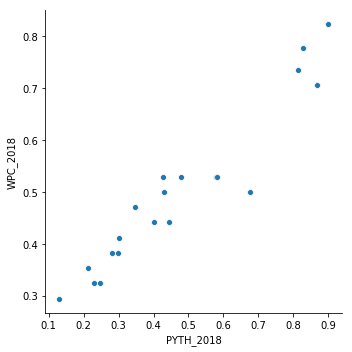

In [46]:
sns.relplot(x="PYTH_2018", y="WPC_2018", data =All_Data);

In [47]:
Pyth_Lm = smf.ols(formula = "WPC_2018~PYTH_2018", data = All_Data).fit()
Pyth_Lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WPC_2018   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           5.02e-11
Time:                        20:48:50   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
PYTH_2018      0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Look Above Two Reg Model

Looking at the above two models and the scatterplot, it is seen that there is a high degree of correlation.
If we want to test statistically;
Since the P-value is less than 0.05, the null hypothesis is rejected. We can use it for prediction. 
Also Conf.Interval dont include 0. So this say everything okey for statistically